In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [21]:
DATADIR = 'dogVscat'
CATEGORIES = ['cat','dog']
IMG_SIZE=100

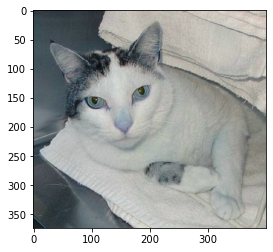

In [22]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


In [23]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [24]:
print(len(training_data))

652


In [25]:
lenofimage = len(training_data)

In [26]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [27]:
X.shape

(652, 30000)

In [28]:
X = X/255.0

In [29]:
X[1]

array([0.96470588, 0.9254902 , 0.7372549 , ..., 0.51372549, 0.51372549,
       0.47058824])

In [30]:
y=np.array(y)

In [31]:
y.shape

(652,)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [33]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [34]:
y2 = svc.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.50920245398773


In [36]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.52      0.62      0.57        84
           1       0.49      0.39      0.44        79

    accuracy                           0.51       163
   macro avg       0.51      0.51      0.50       163
weighted avg       0.51      0.51      0.50       163



In [37]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [38]:
result

,original,predicted
0,0,0
1,1,1
2,1,0
3,0,0
4,1,0
...,...,...
158,0,0
159,0,0
160,0,1
161,1,0
